$$
E^s(r)=j\omega\mu\int_{L'} {I(r')\dfrac{e^{-jkR}}{4\pi R}dl'}
+\dfrac{1}{j\omega\varepsilon}\nabla \int_{L'} \nabla'\cdot I(r')\dfrac{e^{-jkR}}{4\pi R}dl'
$$
where
$$R=|r-r'|$$

test it, we have
$$
\int_L f(r)\cdot E^s(r)dl = j\omega\mu\int_L\int_{L'} f(r)\cdot I(r')\dfrac{e^{-jkR}}{4\pi R}dl'dl+
\dfrac{1}{j\omega\varepsilon} \int_{L}\int_{L'}  \nabla'\cdot I(r')f(r)\cdot \nabla\dfrac{e^{-jkR}}{4\pi R}dl'dl
$$
and then
$$
\int_L f(r)\cdot E^s(r)dl = j\omega\mu\int_L\int_{L'} f(r)\cdot I(r')\dfrac{e^{-jkR}}{4\pi R}dl'dl
-\dfrac{1}{j\omega\varepsilon} \int_{L}\int_{L'}  \nabla'\cdot I(r')f(r)\cdot \nabla R \dfrac{1+jkR}{4\pi R^2}e^{-jkR}dl'dl
$$


discrete it, we have
$$
\int_L f_n(r)\cdot E^s(r)dl = j\omega\mu\sum_m\int_L\int_{L'} f_n(r)\cdot J_m(r')\dfrac{e^{-jkR}}{4\pi R}dl'dl
-
\dfrac{1}{j\omega\varepsilon} \sum_m\int_{L}\int_{L'}  \nabla'\cdot J_m(r')f_n(r)\cdot (r-r')\dfrac{(1+jkR)}{4\pi R^3}e^{-jkR}dl'dl
$$

use pulse function as basis function, and point matching method, we have

$$
({r_n-r_{n-1}})\cdot E^s(r_n^c) = j\omega\mu\sum_m I_m ({r_n-r_{n-1}})\cdot \dfrac{r_m'-r_{m-1}'}{|r_m'-r_{m-1}'|}\int_{L'} \dfrac{e^{-jkR}}{4\pi R}dl'
-
\dfrac{1}{j\omega\varepsilon}  \sum_m  I_m ({r_n-r_{n-1}})\cdot (r_n^c-r')\dfrac{(1+jkR)}{4\pi R^3}e^{-jkR}\left|_{r'=r_{m}'}^{r'=r_{m-1}'}\right.
$$
where
$$
R = |r_n^c-r'|
$$ 
$$
r_n^c = (r_n+r_{n-1})/2+a_n
$$
and $a_n$ stands for thickness or radius or other bias on the $n-$th segment

$$
\int_{L'_n}\dfrac{e^{-jkR}}{4\pi R}dl'
=\dfrac{1}{4\pi}ln\dfrac{\sqrt{1+(2a_n/l_n)^2}+1}{\sqrt{1+(2a_n/l_n)^2}-1}-\dfrac{jkl_n}{4\pi}
$$
where
$$
l_n = |r_n-r_{n-1}|
$$

In [1]:
def getWeightAndPoint_S(order):
    if order ==0:
        return ((2.,),(0,))
    elif order == 1:
        point = list()
        point.append(0.57735)
        point.append(-0.57735)
        weight = list()
        weight.append(1)
        weight.append(1)
        return (weight,point)
        pass
    elif order == 2:
        point = list()
        point.append(0)
        point.append(0.774597)
        point.append(-0.774597)
        weight = list()
        weight.append(0.88888888)
        weight.append(0.55555556)
        weight.append(0.55555556)
        return (weight,point)
        pass
    elif order == 3:
        point = list()
        point.append(0.339981)
        point.append(-0.339981)
        point.append(0.861136)
        point.append(-0.861136)
        weight = list()
        weight.append(0.65214515)
        weight.append(0.65214515)
        weight.append(0.34785485)
        weight.append(0.34785485)
        return (weight,point)
        pass
    elif order == 4:
        point = list()
        point.append(-0.906179845938664)
        point.append(-0.538469310105683)
        point.append(0.)
        point.append(0.538469310105683)
        point.append(0.906179845938664)
        weight = list()
        weight.append(0.236926885056189)
        weight.append(0.478628670499366)
        weight.append(0.568888888888889)
        weight.append(0.478628670499366)
        weight.append(0.236926885056189)
        return (weight,point)
        pass
    else:
        point = list()
        point.append( -0.932469514203152)
        point.append( -0.661209386466265)
        point.append( -0.238619186083197)
        point.append( 0.238619186083197)
        point.append( 0.661209386466265)
        point.append( 0.932469514203152)
        weight = list()
        weight.append(0.171324492379170)
        weight.append(0.360761573048139)
        weight.append(0.467913934572691)
        weight.append(0.467913934572691)
        weight.append(0.360761573048139)
        weight.append(0.171324492379170)
        return (weight,point)
        pass
'''
W,P = getWeightAndPoint_S(2)
print W
print P
P = np.array(P)
PP = (P+1.)/2.
ff = PP**3+2*PP**2+1
print np.dot(np.array(W)/2.,ff)
'''

'\nW,P = getWeightAndPoint_S(2)\nprint W\nprint P\nP = np.array(P)\nPP = (P+1.)/2.\nff = PP**3+2*PP**2+1\nprint np.dot(np.array(W)/2.,ff)\n'

1
[ 2.39836473  0.42509357  0.17401656  0.09392856  0.05845157  0.03971757
  0.03971757]


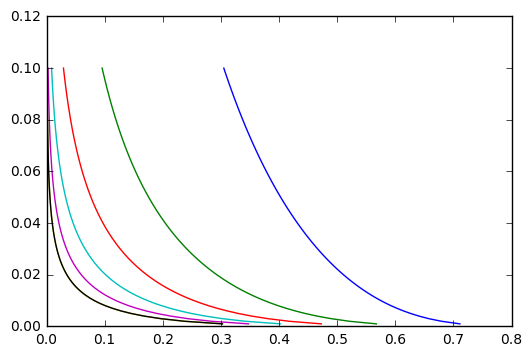

In [2]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

rr = Symbol('r')
x0 = Symbol('x0')
ss = Symbol('s')
f = 1/rr # 被积函数
hh = integrate(f,(rr,x0,x0+ss)) #精确的定积分

# 根据高斯积分格式，返回相对误差的计算公式
def test1(nrule):
    W,P = getWeightAndPoint_S(nrule) # 得到标准的高斯积分格式
    P = np.array(P) # 得到实际的积分点，step1
    PP = x0+(P+1.)/2.*ss # 得到实际的积分点，step2
    WW = np.array(W)/2.*ss # 得到实际的积分权重
    approx = np.sum(np.dot(WW,1./PP)) # 得到高斯积分的计算公式
    exact = hh # 得到精确的定积分

    return abs((approx-exact)/exact) # 返回相对偏差
'''
nrule = 1
sLength = 0.1
for x0Point in [0.005,0.01,0.1,0.2]:
    print test1(nrule).subs(ss,sLength).subs(x0,x0Point).evalf()
'''

# 利用数值方法得到各种格式的阈值
import scipy.optimize as opt

ttt = np.linspace(0.001,0.1,100) # 画图变量
thresholds = list() # 空的阈值矩阵
orders = [0,1,2,3,4,5,6] # 5中常用的积分阶次
for segLength in [1,]: # 对区间长度的备选进行迭代
    threshold_seg = np.array(orders)*0. # 空的阈值向量
    for idd, xx in enumerate(orders): # 对空间阶次进行迭代
        tthg = lambda tt: test1(xx).subs(ss,segLength).subs(x0,tt).evalf()-0.01 # 定义求根方程
        plt.plot([tthg(tx)+0.01 for tx in ttt],ttt) # 将求根方程进行绘制
        try:
            x,r = opt.bisect(tthg,0.0001,10,maxiter=1000,full_output=True,disp=True) # 利用二分法进行求根
            threshold_seg[idd] = x # 将根进行保存
#             print r
        except RuntimeError as re:
            print "RuntimeError: ", e
        except ValueError as ve:
            print "ValueError:", e
        pass
    print segLength # 打印区间长度
    print threshold_seg # 打印阈值向量
    thresholds.append(threshold_seg) # 保存阈值向量到阈值矩阵
# 
# plt.plot([hgs[0](tx)+0.01 for tx in ttt],ttt)
# plt.plot([hgs[1](tx)+0.01 for tx in ttt],ttt)
# plt.plot([hgs[2](tx)+0.01 for tx in ttt],ttt)

# print thresholds
plt.show() # 显示绘制图像

##
# 由于1/x存在缩放，故可以只算s=1的
# 对s=10乘上10，得到相应的阈值
# 对s=2乘上2，得到相应的阈值
# ...
##


In [3]:
from sympy import *
import numpy as np

def genRules(length,nns):
    '''
    # 将1/x在x0处展开
    # 根据展开是确定多项式
    # 根据多项式确定高斯积分的阶次
    n = Symbol('n')
    x0 = Symbol('x0') # x0是区间最靠近0的数
    seg = Symbol('s') # seg是区间的长度
    delta=Symbol('d') # delta是区间的近似程度

    orgForm = seg**((n-1)/(n+1))/delta**(1/(n+1)) # 公式
    hh = orgForm.subs(seg,length) # 指定长度
    hh = hh.subs(delta,0.01/length) # 指定可以接收的误差范围，该值表明控制积分的绝对值
    #hh = hh.subs(delta,0.01/length*np.log(1+100.*length)) # 指定可以接收的误差范围，该值表明控制积分的绝对值
    
    try:
        tables = np.array(nns)*0. # 将判定的距离进行保存
        for kkk,nn in enumerate(nns):
            temp = hh.subs(n,2*nn+1).evalf()
            tables[kkk] = temp
            pass
        return tables
    except Exception as e:
        print e
        raise
    ## 上述的rule的计算方法不完美，所得距离偏大，高斯积分的阶数偏高
    '''
    try:
        # 通过对标准的1/（x-1）进行缩放得到判定的阈值
        temp = np.array([ 2.39836473,  0.42509357,  0.17401656,  0.09392856,  0.05845157, 0.03971757])*length
        b = temp[:len(nns)]
        return b
    except Exception as e:
        print e
        raise
    # 上述方法只能得到阶次为0-5之间的判定阈值，扩展阶次，必须有精确的高斯积分格式
        


def selRule(dist, rules,tables ): # 查表得到相应与dist的最小高斯积分阶次
    try:
        # 从大往小排查，得到相应的高斯积分阶次
        for ii in xrange(len(tables)): # 从大往小迭代
            # 判断是否在阈值范围内
            if dist >= tables[ii]: #在阈值的范围内
                return rules[ii] # 通过配比，返回相应的阶次
            else: # 否则
                pass # 继续迭代
        return rules[-1] # 如果没有配比成功，则返回最高相应的阶次
    except Exception as e:
        print e
        raise

In [4]:
ls = np.linspace(0,0.01,11)
lm = 0.01/(len(ls)-1)
print lm
mesh2 = 1
mesh2 = [[np.array((ls[ii],0,0)), np.array((ls[ii+1],0,0)), lm, 0.0001*lm, np.array([0,0,1])] for ii in xrange(3)]
for cell in mesh2:
    print cell

0.001
[array([ 0.,  0.,  0.]), array([ 0.001,  0.   ,  0.   ]), 0.001, 1.0000000000000001e-07, array([0, 0, 1])]
[array([ 0.001,  0.   ,  0.   ]), array([ 0.002,  0.   ,  0.   ]), 0.001, 1.0000000000000001e-07, array([0, 0, 1])]
[array([ 0.002,  0.   ,  0.   ]), array([ 0.003,  0.   ,  0.   ]), 0.001, 1.0000000000000001e-07, array([0, 0, 1])]


In [5]:
import numpy as np
from scipy import constants as C
import scipy

# 剖分网格，得到$\{r_m\}$和线段$\{(r_{m-1},r_m,l_m, a_m)\}$
# 设置厚度$a$
mesh = mesh2

# 设置基本参数
epsi = C.epsilon_0 #设置介电常数
mu = C.mu_0 # 设置磁导率
vec = 1./np.sqrt(epsi*mu) # 计算光速

freq = 300e6 #设置频率
circleFreq = 2*np.pi*freq # 计算圆频率
wavelength = vec/freq # 计算波长
wavenumber = 2*np.pi/wavelength # 计算波数

# 根据剖分长度计算不同阶次高斯积分的区间段
rules = (0,1,2,3,4,5) # 指定典型的积分阶次
quads = list()
try:
    for xx in mesh:
        quads.append(genRules(xx[2],rules)) # 计算每个线段积分判定的阈值
except Exception as e:
    print e
    raise
    
pi4 = np.pi*4. #预先计算公共因子 
jOmegaMuPi4 = circleFreq*mu/pi4*1.j #预先计算公共因子 
_jOmegaEpsPi4 = -1.j/circleFreq/epsi/pi4 # 预先计算公共因子
jK = 1.j*wavenumber # 预先计算公共因子

# print quads        

if $n=m$, then

$$
Z_{mm} = \dfrac{j\omega\mu l_m }{4\pi}\left(ln\dfrac{\sqrt{1+(2a_m/l_m)^2}+1}{\sqrt{1+(2a_m/l_m)^2}-1}-jkl_m\right)
-\dfrac{l_m^2}{j\omega\varepsilon}\dfrac{1+jkR}{4\pi R^3}e^{-jkR}
$$
further more
$$
Z_{mm} = \dfrac{j\omega\mu l_m }{4\pi}\left(ln\dfrac{\sqrt{1+(2a_m/l_m)^2}+1}{\sqrt{1+(2a_m/l_m)^2}-1}-jkl_m\right)
-\dfrac{l_m^2}{j\omega\varepsilon}\dfrac{1}{4\pi R^3}
$$
where
$$
R = \sqrt{l_m^2/4+a_m^2}
$$

if $m\neq n$, then

$$
Z_{nm}=j\omega\mu\frac{(r_n-r_{n-1})\cdot(r_m'-r_{m-1}')}{l_m}\sum_p W_p\dfrac{e^{-jkR_p}}{4\pi R_p}
-\dfrac{1}{j\omega\varepsilon}(r_n-r_{n-1})\cdot (r_n^c-r')\dfrac{1+jkR_e}{4\pi R_e^3}e^{-jkR_e}|_{r'=r_m'}^{r'=r_{m-1}'}
$$
where
$$
R_e = |r_n^c-r'|
$$ 
$$
r_n^c = (r_n+r_{n-1})/2+a_n
$$
$$
R_p=|r_n^c-r_p'|
$$

In [6]:
# 循环迭代 产生矩阵
try:
    Z_re = np.zeros((len(mesh),len(mesh)),dtype=float) #阻抗矩阵的实部
    Z_im = np.zeros((len(mesh),len(mesh)),dtype=float) #阻抗矩阵的虚部
except Exception as e:
    print e
    raise
    
for n,seg_n in enumerate(mesh): # 遍历所有测试
    try:
        r_nc = (seg_n[0]+seg_n[1])/float(2)+seg_n[4]*seg_n[3] # 计算测试的中心点
        vec_n = (seg_n[1]-seg_n[0]) # 计算测试的向量
        an = seg_n[3] #偏置的长度
        ln = seg_n[2] # 线段的长度
#         v_n = seg_m[4] #偏置的向量
    except Exception as e:
        print e
        raise
    for m,seg_m in enumerate(mesh):  # 遍历所有展开
        temp = 0+0.j 
        # 判断是否重合
        if n==m: # 重合
            try:
                am = seg_m[3]
                lm = seg_m[2]
            except Exception as e:
                print e
                raise
            # 计算 $R = \sqrt{l_m^2/4+a_m^2}$
            try: 
                R = np.sqrt(lm**2/4.+am**2)
            except Exception as e:
                print e
                raise
            # 计算$$Z_{mm} = \dfrac{j\omega\mu l_m }{4\pi}\left(ln\dfrac{\sqrt{1+(2a_m/l_m)^2}+1}{\sqrt{1+(2a_m/l_m)^2}-1}-jkl_m\right)-\dfrac{l_m^2}{j\omega\varepsilon}\dfrac{1}{4\pi R^3}$$
            try:
                temp = jOmegaMuPi4*lm*(scipy.log((np.sqrt(1+(2*am/lm)**2)+1)/(1+np.sqrt(1+(2*am/lm)**2)+1))-jK*lm)
#                 temp = temp-_jOmegaEpsPi4*lm**2/R**3
                temp = -_jOmegaEpsPi4*lm**2/R**3
            except Exception as e:
                print e
                raise
        else: #  不重合
            try:
                vec_m = (seg_m[1]-seg_m[0]) # 计算展开的向量
#                 am = seg_m[3] # 偏置的长度
                lm = seg_m[2] # 线段的长度
                
            except Exception as e:
                print e
                raise
            # 根据线段距离选择计算方式
            dist = 1 # 计算两线段间的距离
            try:
                deltas = [seg_n[0]-seg_m[0],seg_n[1]-seg_m[0],seg_n[0]-seg_m[1],seg_n[1]-seg_m[1]] #计算端点间间距 step 1
                dist = np.min([np.dot(xx,xx) for xx in deltas]) # step 2
                dist = np.sqrt(dist) # step 3
            except Exception as e:
                print e
                raise
            # print dist
            # 选择不同的积分方式
            try:
                orderGauss = selRule(dist,rules,quads[m]) #根据距离选择不同的积分阶
#                 print dist, "  ", orderGauss
            except Exception as e:
                print e
                raise
            try:
                W,P = getWeightAndPoint_S(orderGauss) #根据阶级得到标准的高斯积分权重和位置
#                 W,P = getWeightAndPoint_S(1) #根据阶级得到标准的高斯积分权重和位置
                W = np.array(W)
                W = W*lm/float(2) #计算权重
                P = np.array(P)
            except Exception as e:
                print e
                raise
            # 计算R_p=|r_n^c-r_p'|
            try:
                r_pp = [seg_m[0]+(0.5*pp+0.5)*(seg_m[1]-seg_m[0]) for pp in P] #计算积分点
                R_p = [np.dot(r_nc-xx,r_nc-xx) for xx in r_pp] #计算积分点和测试点之间的距离-step1
                R_p = np.sqrt(R_p) #计算积分点和测试点之间的距离-step2
                # 计算\sum_p W_p\dfrac{e^{-jkR_p}}{4\pi R_p}       
                temp_1 =  scipy.sum(W*scipy.exp(-jK*R_p)/R_p)
                # 计算\frac{(r_n-r_{n-1})\cdot(r_m'-r_{m-1}')}{l_m}\sum_p W_p\dfrac{e^{-jkR_p}}{4\pi R_p}
                temp_1 = temp_1*np.dot(vec_n,vec_m)/lm
                # print temp_1
            except Exception as e:
                print e
                raise
            
            # 计算R_e = |r_n^c-r'|
            try:
                r_p = [seg_m[0],seg_m[1]]
                R_e = [np.dot(r_nc-xx,r_nc-xx) for xx in r_p] #计算端点和测试点之间的距离-step1
                R_e = np.sqrt(R_e) #计算端点和测试点之间的距离-step2      
                # 计算 \dfrac{1+jkR_e}{4\pi R_e^3}e^{-jkR_e}|_{r'=r_m'}^{r'=r_{m-1}'}
                tempRe = ((float(1)+jK*R_e)/R_e**3)*scipy.exp(-jK*R_e)
                # 计算(r_n-r_{n-1})\cdot (r_n^c-r')\dfrac{1+jkR_e}{4\pi R_e^3}e^{-jkR_e}|_{r'=r_m'}^{r'=r_{m-1}'}
                temp_2 = tempRe[0]*(r_nc-seg_m[0])-tempRe[1]*(r_nc-seg_m[1]) # step1
                temp_2 = np.dot(temp_2,vec_n) # step2
                
                # print temp_2
            except Exception as e:
                print e
                print temp_2
                print R_e
                print r_nc-seg_m[0]
                print r_nc-seg_m[1]
                print vec_n
                print np.dot(r_nc-seg_m[0],vec_n), tempRe[0], np.dot(r_nc-seg_m[0],vec_n)* tempRe[0]
                print np.dot(r_nc-seg_m[1],vec_n), tempRe[1], np.dot(r_nc-seg_m[1],vec_n)* tempRe[1]
                raise
            
            # 计算 j\omega\mu\frac{(r_n-r_{n-1})\cdot(r_m'-r_{m-1}')}{l_m}\sum_p W_p\dfrac{e^{-jkR_p}}{4\pi R_p}-\dfrac{1}{j\omega\varepsilon}(r_n-r_{n-1})\cdot (r_n^c-r')\dfrac{1+jkR_e}{4\pi R_e^3}e^{-jkR_e}|_{r'=r_m'}^{r'=r_{m-1}'}
#             temp = temp_1*jOmegaMuPi4-temp_2*_jOmegaEpsPi4
            temp = temp_1*jOmegaMuPi4-temp_2*_jOmegaEpsPi4
        try:
            Z_re[n][m]=np.real(temp) # 存放实部
            Z_im[n][m]=np.imag(temp) # 存放虚部
        except Exception as e:
            print e
            raise
print Z_re
print Z_im
print Z_re + 1.j*Z_im

[[ 0.00118517  0.00158022  0.00158018]
 [ 0.00158022  0.00118517  0.00158022]
 [ 0.00158018  0.00158022  0.00118517]]
[[ 38144.27576974 -16952.83823046  -1356.14746092]
 [-16952.83823046  38144.27576974 -16952.83823046]
 [ -1356.14746092 -16952.83823046  38144.27576974]]
[[ 0.00118517+38144.27576974j  0.00158022-16952.83823046j
   0.00158018 -1356.14746092j]
 [ 0.00158022-16952.83823046j  0.00118517+38144.27576974j
   0.00158022-16952.83823046j]
 [ 0.00158018 -1356.14746092j  0.00158022-16952.83823046j
   0.00118517+38144.27576974j]]


从下图<img src="electric_field.png", width=300>说明由电荷激发的电场在单元附近的不同区域测试必然会出现符号相反的情况
$$
    E_1 = -\dfrac{1}{j\omega\varepsilon}\nabla\int_\Omega\nabla\cdot J \dfrac{e^{-jkR}}{4\pi R}d\Omega
$$

从下图<img src="electric_field_byJ.png", width=300>说明由电流激发的电场在单元附近的不同区域测试必然会出现符号相反相同的情况
$$
E_2 = j\omega\mu\int_\Omega J\dfrac{e^{-jkR}}{4\pi R}d\Omega
$$

在远些的区域则由于$e^{-jkR}$(分布的辐射电阻和耦合电容)的原因，使得测试的符号情况变得更加复杂

而阻抗的符号则是两者的叠加。当网格剖分很小($kR$很小)的时候，则体现的是电荷的激发场；当网格相对较大($kR$很大)时候，则体现的是电流的激发场

In [44]:
import scipy.linalg
import numpy.linalg

# a,b = scipy.linalg.eig?
try:
    X = Z_re
    R = Z_im
    a,b = scipy.linalg.eig(X,R)
#     print a
#     print b
    for kk in xrange(len(a)):
        print np.dot((X-a[kk]*R),b[:,kk:(kk+1)])
except scipy.linalg.LinAlgError as lae:
    print lae
except Exception as e:
    print e


[[ 2.28116137e-16+0.j]
 [-3.56919355e-16+0.j]
 [ 3.27212216e-16+0.j]
 [ 1.30104261e-16+0.j]
 [-4.69242700e-16+0.j]
 [-4.16333634e-16+0.j]
 [-6.62664368e-16+0.j]
 [-4.16333634e-17+0.j]
 [ 0.00000000e+00+0.j]
 [-8.32667268e-17+0.j]]
[[ 7.10152423e-17+0.j]
 [ 1.04083409e-17+0.j]
 [ 9.43255890e-17+0.j]
 [ 4.66206934e-18+0.j]
 [-1.84043319e-17+0.j]
 [ 1.10317571e-17+0.j]
 [-9.64939934e-17+0.j]
 [ 3.98986399e-17+0.j]
 [-5.55111512e-17+0.j]
 [ 2.77555756e-17+0.j]]
[[-1.80302821e-16+0.j]
 [ 3.40439482e-17+0.j]
 [ 9.20487644e-17+0.j]
 [ 3.03576608e-18+0.j]
 [-3.68628739e-17+0.j]
 [ 9.10729825e-18+0.j]
 [ 1.38777878e-17+0.j]
 [-3.20923843e-17+0.j]
 [ 8.32667268e-17+0.j]
 [ 8.32667268e-17+0.j]]
[[ 2.30935063e-17+0.j]
 [-3.93565389e-17+0.j]
 [-2.65629532e-18+0.j]
 [-1.34441069e-17+0.j]
 [ 3.82723367e-17+0.j]
 [ 3.55076211e-18+0.j]
 [ 8.20198943e-17+0.j]
 [-4.55364912e-17+0.j]
 [-6.93889390e-18+0.j]
 [-1.38777878e-17+0.j]]
[[-3.33392168e-17+0.j]
 [ 3.59955121e-17+0.j]
 [-1.66967135e-17+0.j]
 [-2.00